## IX. Regular Expressions

*Regex or Regexp is a sequence of characters used to specify text patterns e.g., search, match, replace and split*



### Lesson 23: Regex Basics

* Writing code to do pattern matching without regular expressions is a huge pain.
* Regex strings often use backslashes (like \d), so they are often written using raw strings: r'\d'
* \d is the regex for a numeric digit character.
* Import the re module first.
* Call the re.compile() function to create a regex object.
* Call the regex object's search() method to create a match object.
* Call the match object's group() method to get the matched string.

**Search**

In [346]:
import re
message = 'My phone number is 415-555-1011 and alternate will be 415-504-1022'
message = 'My phone number is 415-555-1011 and alternate will be 415-504-1022'

phoneregex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')  #\d used for digit search
mo = phoneregex.search(message)
print(mo)

<re.Match object; span=(19, 31), match='415-555-1011'>


**findall**

In [88]:
phoneregex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')  #\d used for digit search
print(phoneregex.findall('My phone number is 415-555-1011 and alternate will be 415-504-1022'))

['415-555-1011', '415-504-1022']


### Lesson 24: Regex Groups and the Pipe Character
* Groups are created in regex strings with parentheses.
* The first set of parentheses is group 1, the second is 2, and so on.
* Calling group() or group(0) returns the full matching string, group(1) returns group 1's matching string, and so on.
* Use \ ( and \ ) to match literal parentheses in the regex string.
* The | pipe can match one of many possible groups.

**Group**

In [68]:
message = 'My phone number is 415-555-1011 and alternate will be 415-504-1022'

phoneregex = re.compile(r'(\d\d\d)-(\d\d\d)-(\d\d\d\d)')
mo = phoneregex.search(message)

print(mo.group(1))
print(mo.group(2))
print(mo.group(3))

415
555
1011


**Searching Parenthesis**

In [69]:
message = 'My phone number is (415) 555-1011'

regexp = re.compile(r'\(\d\d\d\) \d\d\d-\d\d\d\d')
regexp.search(message)

<re.Match object; span=(19, 33), match='(415) 555-1011'>

**| Pipe Character**

In [70]:
regexp = re.compile(r'Hel(icopter|ipad|lo)')

mo = regexp.search('there was a Helicopter')
print(mo.group(1)) #suffix
print(mo.group()) 

### Lesson 25: Repitition and Greedy/Nongreedy matching

* The ? says the group matches zero or one times.
* The * says the group matches zero or more times.
* The + says the group matches one or more times.
* The curly braces can match a specific number of times.
* The curly braces with two numbers matches a minimum and maximum number of times.
* Leaving out the first or second number in the curly braces says there is no minimum or maximum.
* "Greedy matching" matches the longest string possible, "nongreedy matching" (or "lazy matching") matches the shortest string possible.
* Putting a question mark after the curly braces makes it do a nongreedy/lazy match.

**star character**

In [106]:
batregex = re.compile(r'Bat(wo)*man')  #wo can appear 0 or more times

In [347]:
m1 = batregex.search('She is a Batwowoman')
print(m1.group())

m1 = batregex.search('She is a Batman')
print(m1.group())

Batwowoman
Batman


In [117]:
#print escape character

plusregex = re.compile(r'\+\*\?\d\d')
plusregex.search('my number starts with +*?91')

**Set of characters**

* '?' = 0 or 1
* '*' = 0 or more
* '+' = 1 or more
* {x} = exact

In [350]:
# ? for 0 or 1
Qregex = re.compile(r'name?')
Qregex.search('his name is')

<re.Match object; span=(4, 8), match='name'>

In [352]:
# + for 1 or more
plusregex = re.compile(r'(name)+')
plusregex.findall('his name name is joy')

['name', 'name']

In [354]:
# {x} for exact iterations
exactregex = re.compile(r'(name){3}')
exactregex.search('his namenamename is joy')

<re.Match object; span=(4, 16), match='namenamename'>

In [159]:
# {x,y} range of desired outcomes 
exactregex = re.compile(r'(name){3,5}')
exactregex.search('his namenamenamename is joy')

<re.Match object; span=(4, 20), match='namenamenamename'>

**Greedy Match**

In [157]:
greedyregex = re.compile(r'(\d){3,5}')
greedyregex.search('123456789')  #It will return maximum result hence greedy

<re.Match object; span=(0, 5), match='12345'>

**Non Greedy Match**

In [158]:
nongreedyregex = re.compile(r'(\d){3,5}?')
nongreedyregex.search('123456789')  #It will any string result hence greedy

<re.Match object; span=(0, 3), match='123'>

### Lesson 26: Regex Character Classes and findall() Method

* The regex method findall() is passed a string, and returns all matches in it, not just the first match.
* If the regex has 0 or 1 group, findall() returns a list of strings.
* If the regex has 2 or more groups, findall() returns a list of tuples of strings.
* \d is a shorthand character class that matches digits. \w matches "word characters" (letters, numbers, and the underscore). \s matches whitespace characters (space, tab, newline).
* The uppercase shorthand character classes \D, \W, and \S match charaters that are not digits, word characters, and whitespace.
* You can make your own character classes with square brackets: [aeiou]
* A ^ caret makes it a negative character class, matching anything not in the brackets: [^aeiou]

**findall**

In [164]:
phoneregex = re.compile(r'\d\d\d-\d\d\d')

resume = """my number is 123-456 and my friend's number is 789-012"""
phoneregex.findall(resume)

['123-456', '789-012']

In [167]:
#Searching in groups

phoneregex = re.compile(r'((\d\d\d)-(\d\d\d))')

resume = """my number is 123-456 and my friend's number is 789-012"""
phoneregex.findall(resume) #Three groups one outer, 2 inner

[('123-456', '123', '456'), ('789-012', '789', '012')]

**Regex Character Classes**

Hint 
* small letter matches
* capital does not match

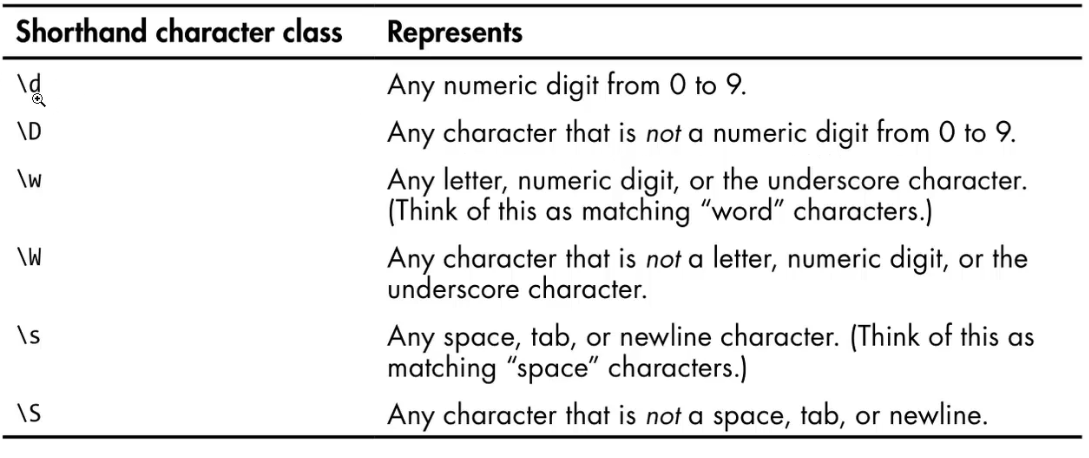

In [175]:
# Digits + Words

sentence = 'There were 12 friends, and 2 dogs, 3 coffee mugs and 1 orange'
DigitRegex = re.compile(r'\d+\s\w+')
DigitRegex.findall(sentence)

['12 friends', '2 dogs', '3 coffee', '1 orange']

**Creating own Regex Character Class**

Syntax = RegexObj = re.compile(r'[text]') similar to #r'(a\e\i\o\u)'

In [182]:
#Creating Vowel regex character

RVC = re.compile(r'[aeiouAEIOU]')
RVC.findall('A quick Brown Fox runs over a lAzy dOg')

['A', 'u', 'i', 'o', 'o', 'u', 'o', 'e', 'a', 'A', 'O']

**Ignore Case Sensitiveness = re.Ignore**

In [290]:
#Case Insensitive Matching 

RVC = re.compile(r'[aeiou]', re.I)  #re.I will make sure to pass sensitiveness
RVC.findall('A quick Brown Fox runs over a lAzy dOg')

['A', 'u', 'i', 'o', 'o', 'u', 'o', 'e', 'a', 'A', 'O']

In [291]:
#Creating Double Vowel regex character

DRVC = re.compile(r'[aeiouAEIOU]{2}')
DRVC.findall('A quick Brown Fox runs over a lAAzy dOOg')

['ui', 'AA', 'OO']

In [292]:
#Creating Not in Vowel regex character with ^ Caret symbol

RVC = re.compile(r'[^aeiouAEIOU]')
RVC.findall('A quick Brown')  #none of the vowels

[' ', 'q', 'c', 'k', ' ', 'B', 'r', 'w', 'n']

### Lesson 27: Regex Character Classes and findall() Method

* ^ means the string must start with pattern, $ means the string must end with the pattern. Both means the entire string must match the entire pattern.
* The . dot is a wildcard; it matches any character except newlines.
* Pass re.DOTALL as the second argument to re.compile() to make the . dot match newlines as well.
* Pass re.I as the second argument to re.compile() to make the matching case-insensitive.

**^ this pattern begins**

In [309]:
RgexS = re.compile(r'^Hello')
Sent = ('Hello smile Hello darkness friend') #only ist Hello is True

RgexS.search(Sent)

<re.Match object; span=(0, 5), match='Hello'>

**$ this pattern ends**

In [310]:
RgexE = re.compile(r'world$')
Sent = ('Hello world') #only last world is True

RgexE.search(Sent)

<re.Match object; span=(6, 11), match='world'>

**using ^ and $ Together**

In [311]:
RgexSE = re.compile(r'^Hello world$')
Sent = ('Hello world') #only last world is True

RgexSE.search(Sent)

<re.Match object; span=(0, 11), match='Hello world'>

**dot . = Any SINGLE character than new line**

In [312]:
RgexD = re.compile(r'.at')
Sent = ('cat sat on a flat mat')

RgexD.findall(Sent) #flat is not there because only one character allowed

['cat', 'sat', 'lat', 'mat']

In [313]:
# Any two characters with dot

RgexDD = re.compile(r'.{1,2}at') #can be more than 1 character
Sent = ('cat sat on a flat mat')

RgexDD.findall(Sent) 

['cat', ' sat', 'flat', ' mat']

**dot * = Whatever Value**

In [314]:
x = 'First Name: Tajamul, Last Name: Khan'
dotstarregex = re.compile(r'First Name: (.*) Last Name: (.*)')
dotstarregex.findall(x)

[('Tajamul,', 'Khan')]

In [315]:
# Dot Star is always greedy 

y = '<he is my boss> he is truely amazing>'

Dotstarreg = re.compile(r'<.*>') #inorder to avoid this we can put ? after *
Dotstarreg.findall(y)

['<he is my boss> he is truely amazing>']

In [316]:
# Dot does not pass new line, how to counter that ?

tex = 'hey!\nhow are you\how is it going'

rege = re.compile(r'.*', re.DOTALL)  #DOTALL Helps
rege.search(tex)

<re.Match object; span=(0, 32), match='hey!\nhow are you\\how is it going'>

### Lesson 28: Regex sub() Method and Verbose Mode

* The sub() regex method will substitute matches with some other text.
* Using \1, \2 and so will substitute group 1, 2, etc in the regex pattern.
* Passing re.VERBOSE lets you add whitespace and comments to the regex string passed to re.compile().
* If you want to pass multiple arguments (re.DOTALL , re.IGNORECASE, re.VERBOSE), combine them with the | bitwise operator.

**Matching Word Character**

In [323]:
tex = 'Mr Tajamul is also known as Mr Khan'
regexp = re.compile(r'Mr \w+')

regexp.findall(tex)

['Mr Tajamul', 'Mr Khan']

**sub Method = Find and Replace**

In [326]:
tex = 'Mr Tajamul is also known as Mr Khan'
regexp = re.compile(r'Mr \w+')

regexp.sub('Anonymus',tex) #Finds and replaces value

'Anonymus is also known as Anonymus'

**Verbose Format**

In [343]:
#Can ignore whitespaces and add comments

number = '(630)-1234 , (630)-1245'
regexp = re.compile(r'''
\(\d\d\d\) #Area code
-
\d\d\d\d  #Extension''' 
, re.VERBOSE)

regexp.findall(number)

['(630)-1234', '(630)-1245']

**Passing multiple Options**

In [345]:
number = '(630)-1234 , (630)-1245'
regexp = re.compile(r'''
\(\d\d\d\) #Area code
-
\d\d\d\d''' 
, re.VERBOSE | re.I | re.DOTALL)

regexp.findall(number)

['(630)-1234', '(630)-1245']

### Lesson 29: Regex Example Program: Phone and Email Scraper

In [52]:
pdf = """EXAMPLE PHONE AND EMAIL
DIRECTORY
This example PDF was created to practice writing programs that could automatically get phone numbers
and email addresses from PDFs.
You can learn to program with the free resources at https://inventwithpython.com
PUBLIC DOMAIN IMAGE OF THE SEAL OF APPROVAL
"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et
dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip
ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore
eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia
deserunt mollit anim id est laborum."
Jessie Mckay jmckay67@aol.com 479-205-4874
Tom Jordan tjordan@msn.com 678-560-3485
Clayton Cross ccross20@gmail.com 724-900-2986
Rayford Sutton rayfords66@hotmail.com 242-391-3183
Jerome Gentry jgentry@me.com 604-720-6426
Weldon Camacho wcamacho57@icloud.com 651-807-8065
Quinton Franks qfranks@comcast.net 209-754-9111
Adam Hubbard cygzfjd61@outlook.com 641-433-6698
Jarred Fox jfox39@live.com 701-528-9851
Arnoldo Parker aparker39@sbcglobal.net 304-491-9583
Sid Mcdaniel mcdanie3354@att.net 863-583-8107
Raymon Combs uqcwsntti71@att.net 507-948-3980
Ervin Francis efrancis@optonline.net 546-367-3454
Gilberto Austin austi363@optonline.net 321-854-5616
Lino Barlow lbarlow22@me.com 904-896-2920
Stacey Shepherd sshepherd61@sbcglobal.net 309-387-1990
Roscoe Terry rterry64@outlook.com 605-373-2329
Eddie Meadows eddiem89@yahoo.com 573-454-1209
Carlos Simpson csimpson8@verizon.net 252-822-2439
"""

**Phone Scrapper**

In [58]:
import re 
Phoneregex = re.compile(
r'''
(
((\d\d\d) | (\(\d\d\d\)))?    # Optional area code: can be 123 or (123)
(\s|-)?                       # Optional separator: space or dash
\d\d\d                        # First 3 digits of the phone number
-                             # Separator: dash
\d\d\d\d                      # Last 4 digits of the phone number
(((ext(\.)?\s) | x)          # Optional extension prefix: ext, ext., or x
(\d{2,5}))?                   # Optional extension number: 2 to 5 digits
)
''', re.VERBOSE)

In [59]:
phoneNumbers = Phoneregex.findall(pdf)

In [60]:
allPhoneNumbers = []
for Number in phoneNumbers:
    allPhoneNumbers.append(Number[0])

In [56]:
allPhoneNumbers

['479-205-4874',
 '678-560-3485',
 '724-900-2986',
 '242-391-3183',
 '604-720-6426',
 '651-807-8065',
 '209-754-9111',
 '641-433-6698',
 '701-528-9851',
 '304-491-9583',
 '863-583-8107',
 '507-948-3980',
 '546-367-3454',
 '321-854-5616',
 '904-896-2920',
 '309-387-1990',
 '605-373-2329',
 '573-454-1209',
 '252-822-2439']

**Email Scrapper**

In [65]:
import re 

emailregex = re.compile(
    r'''
    [a-zA-Z0-9_.+]+  #name
    @                #symbol
    [a-zA-Z0-9_.+]+  #domain name part
    ''', re.VERBOSE)

In [67]:
emails = emailregex.findall(pdf)
emails

['jmckay67@aol.com',
 'tjordan@msn.com',
 'ccross20@gmail.com',
 'rayfords66@hotmail.com',
 'jgentry@me.com',
 'wcamacho57@icloud.com',
 'qfranks@comcast.net',
 'cygzfjd61@outlook.com',
 'jfox39@live.com',
 'aparker39@sbcglobal.net',
 'mcdanie3354@att.net',
 'uqcwsntti71@att.net',
 'efrancis@optonline.net',
 'austi363@optonline.net',
 'lbarlow22@me.com',
 'sshepherd61@sbcglobal.net',
 'rterry64@outlook.com',
 'eddiem89@yahoo.com',
 'csimpson8@verizon.net']

## X. Files

### Lesson 30: File Names and Absolute/Relative File Path

* Files have a name and a path.
* The root folder is the lowest folder. c:\ for windows and / for mac
* In a file path, the folders and filename are separated by backslashes on Windows and forward slashes on Linux and Mac.
* Use the os.path.join() function to combine folders with the correct slash.
* The current working directory is the oflder that any relative paths are relative to.
* os.getcwd() will return the current working directory.
* os.chdir() will change the current working directory.
* Absolute paths begin with the root folder, relative paths do not.
* The . folder represents "this folder", the .. folder represents "the parent folder".
* os.path.abspath() returns an absolute path form of the path passed to it.
* os.path.relpath() returns the relative path between two paths passed to it.
* os.makedirs() can make folders.
* os.path.getsize() returns a file's size.
* os.listdir() returns a list of strings of filenames.
* os.path.exists() returns True if the filename passed to it exists.
* os.path.isfile() and os.path.isdir() return True if they were passed a filename or file path.

In [71]:
r'/Users/tajamulk2/Downloads/lesson6-recap.txt'

'/Users/tajamulk2/Downloads/lesson6-recap.txt'

**os library**

The os module in Python helps you work with your computer's operating system. It lets you do things like create, delete, and move files and folders, get information about your system, and manage processes. 

It's a bridge between python program and computer operating system.

In [146]:
import os 

# To combine folder with file name

os.path.join('folder1', 'folder2', '.png')

'folder1/folder2/.png'

In [117]:
# current working directory

os.getcwd()

'/Users/tajamulk2/Downloads'

In [118]:
# change directory

os.chdir('/Users/tajamulk2/Downloads/')
os.getcwd()

'/Users/tajamulk2/Downloads'

**Absolute and Relative File Path**

In [119]:
# Absolute File path = Complete File Path  (..)

'/Users/tajamulk2/Downloads/Hey.png''

# Relative File path = Considers the file will be in last path/ is not complete (.)

'Downloads/Hey.png''

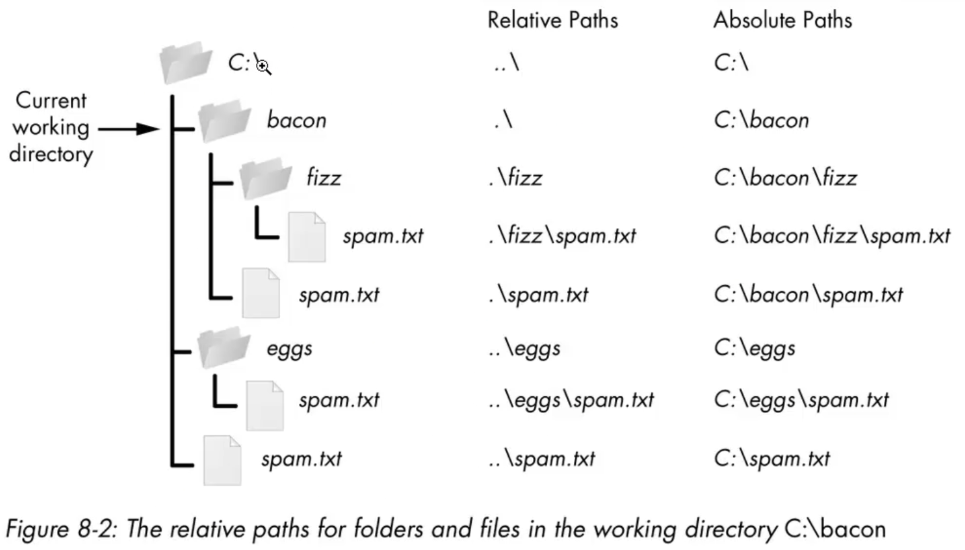

In [141]:
#get absolute and real path 

print(os.path.abspath('shinchan.png'))

x = os.getcwd()
os.path.relpath(/Users/tajamulk2/Downloads, 'tajamulk2') #abspath , cwd

/Users/tajamulk2/Downloads/shinchan.png


'../img.png'

In [133]:
#conversion of relative file path into abs

os.path.abspath('../../shinchan.png')

'/Users/shinchan.png'

**dirname basename**

In [148]:
# dirname = name of directory
print(os.path.dirname('Users/tajamulk2/folder1/del.img'))

# basename = last name of directory
print(os.path.basename('Users/tajamulk2/folder1/del.img'))

Users/tajamulk2/folder1
del.img


**exists**

In [151]:
os.path.exists('/Users/tajamulk2/Downloads/lesson6-recap.txt')

True

**size**

In [152]:
os.path.getsize('/Users/tajamulk2/Downloads/lesson6-recap.txt')

434

**list**

In [161]:
#lists all files and folders
os.listdir('/Users/tajamulk2/Downloads/OnVUE-24.4.103.zip')

NotADirectoryError: [Errno 20] Not a directory: '/Users/tajamulk2/Downloads/OnVUE-24.4.103.zip'

**create folder AKA directory**

In [164]:
os.makedirs('/Users/tajamulk2/Downloads/new/walnut/waffles')

### Lesson 31: Reading and Writing Plain Text Files

**open read & close text file**

In [190]:
# open file
file = open('/Users/tajamulk2/Downloads/lesson26-recap.txt')

# read returns single string
file.read()

'The regex method findall() is passed a string, and returns all matches in it, not just the first match.\nIf the regex has 0 or 1 group, findall() returns a list of strings.\nIf the regex has 2 or more groups, findall() returns a list of tuples of strings.\n\\d is a shorthand character class that matches digits. \\w matches "word characters" (letters, numbers, and the underscore). \\s matches whitespace characters (space, tab, newline).\nThe uppercase shorthand character classes \\D, \\W, and \\S match charaters that are not digits, word characters, and whitespace.\nYou can make your own character classes with square brackets: [aeiou]\nA ^ caret makes it a negative character class, matching anything not in the brackets: [^aeiou]'

In [191]:
# readlines returns list of strings

file = open('/Users/tajamulk2/Downloads/lesson26-recap.txt')

file.readlines()

['The regex method findall() is passed a string, and returns all matches in it, not just the first match.\n',
 'If the regex has 0 or 1 group, findall() returns a list of strings.\n',
 'If the regex has 2 or more groups, findall() returns a list of tuples of strings.\n',
 '\\d is a shorthand character class that matches digits. \\w matches "word characters" (letters, numbers, and the underscore). \\s matches whitespace characters (space, tab, newline).\n',
 'The uppercase shorthand character classes \\D, \\W, and \\S match charaters that are not digits, word characters, and whitespace.\n',
 'You can make your own character classes with square brackets: [aeiou]\n',
 'A ^ caret makes it a negative character class, matching anything not in the brackets: [^aeiou]']

In [192]:
# closing the file

file.close()

**Writing and Appending Text Files**

In [ ]:
# Writing mode

nfile = 